
# WINE QUALITY PREDICTION

In [1]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Read csv File

In [2]:
# Read the csv file
data = pd.read_csv('winequalityN.csv')

In [3]:
# Good practices to make a copy of the original dataframe to avoid loss of data 
df = data.copy()

In [4]:
#View the data
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.shape

(6497, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Data exploration & cleaning

In [7]:
# Convert the type column to numeric values using dummy variables
df = pd.concat([df, pd.get_dummies(df['type'])], axis=1)

In [8]:
#drop 'type'column
df = df.drop('type', axis=1)

In [9]:
print("num of rows", df.shape[0])
print("num of columns", df.shape[1])

num of rows 6497
num of columns 14


In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   uint8  
 13  white                 6497 non-null   uint8  
dtypes: float64(11), int64(1), uint8(2)
memory usage: 621.9 KB


In [12]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
red                      0
white                    0
dtype: int64

In [13]:
# Remove rows with null values from the dataframe
df_no_null = df.dropna()

# Check the number of rows before and after removing null values
print("Number of rows before removing null values:", len(df))
print("Number of rows after removing null values:", len(df_no_null))


Number of rows before removing null values: 6497
Number of rows after removing null values: 6463


In [14]:
#Data Statistics

df_no_null.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.246480,0.753520
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.430995,0.430995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000



# Visualise distribution of the dataset

In [15]:
# Get column names
df_no_null.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red', 'white'],
      dtype='object')

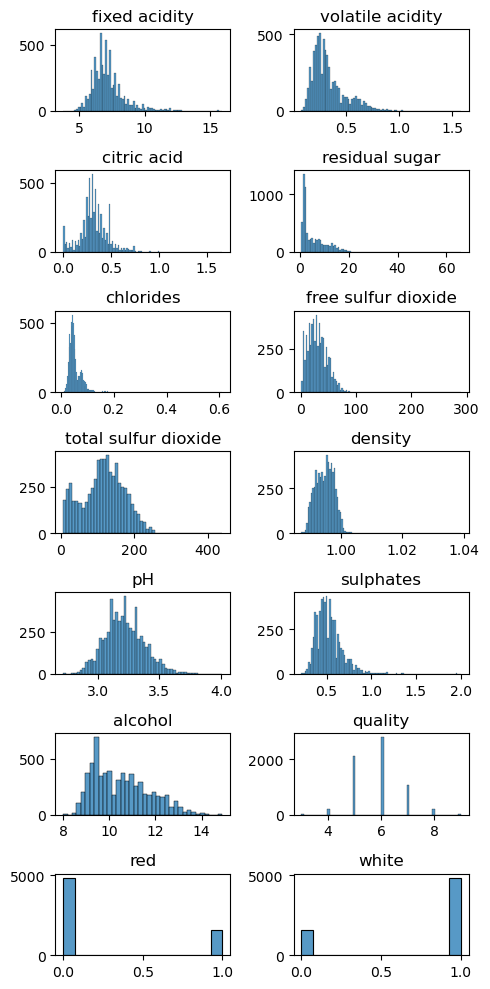

In [16]:
# Get the number of columns and rows in the dataset
ncols = df_no_null.shape[1]
nrows = int(ncols / 2)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(5, 10))

# Loop through each column and plot its histogram and density
i = 0 # Initialize a counter variable
for col in df_no_null.columns:
    # Get the row and column index of the subplot
    row = i // 2
    j = i % 2 # Use a different variable name for the column index
    
    # Plot the histogram and density of the column values
    sns.histplot(df_no_null[col], ax=axes[row, j])
    
    # Set the title and labels of the subplot using the column name
    axes[row, j].set_title(col)
    axes[row, j].set_xlabel("")
    axes[row, j].set_ylabel("")

    # Increment the counter variable
    i += 1

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


# Correlation of features

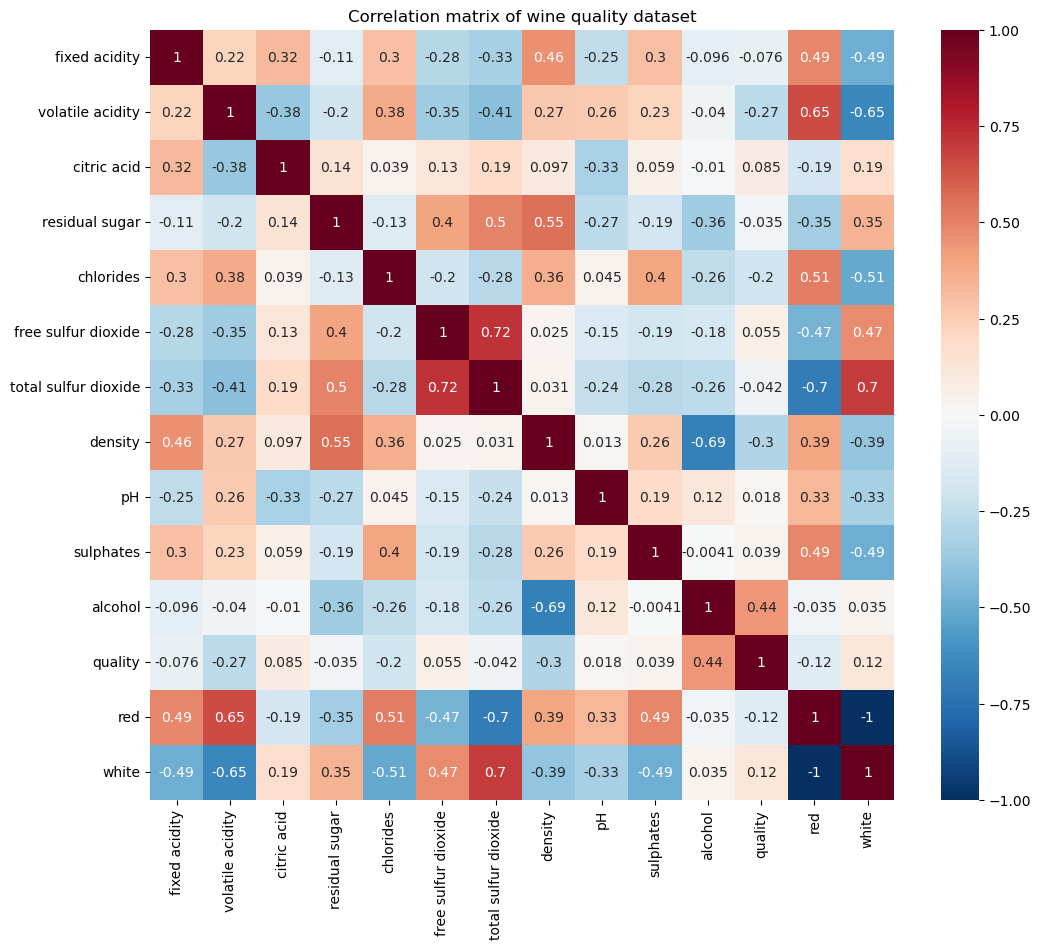

In [17]:
# Calculate the correlation matrix
corr = df_no_null.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="RdBu_r")
plt.title("Correlation matrix of wine quality dataset")
plt.show()




# Bivariate analysis

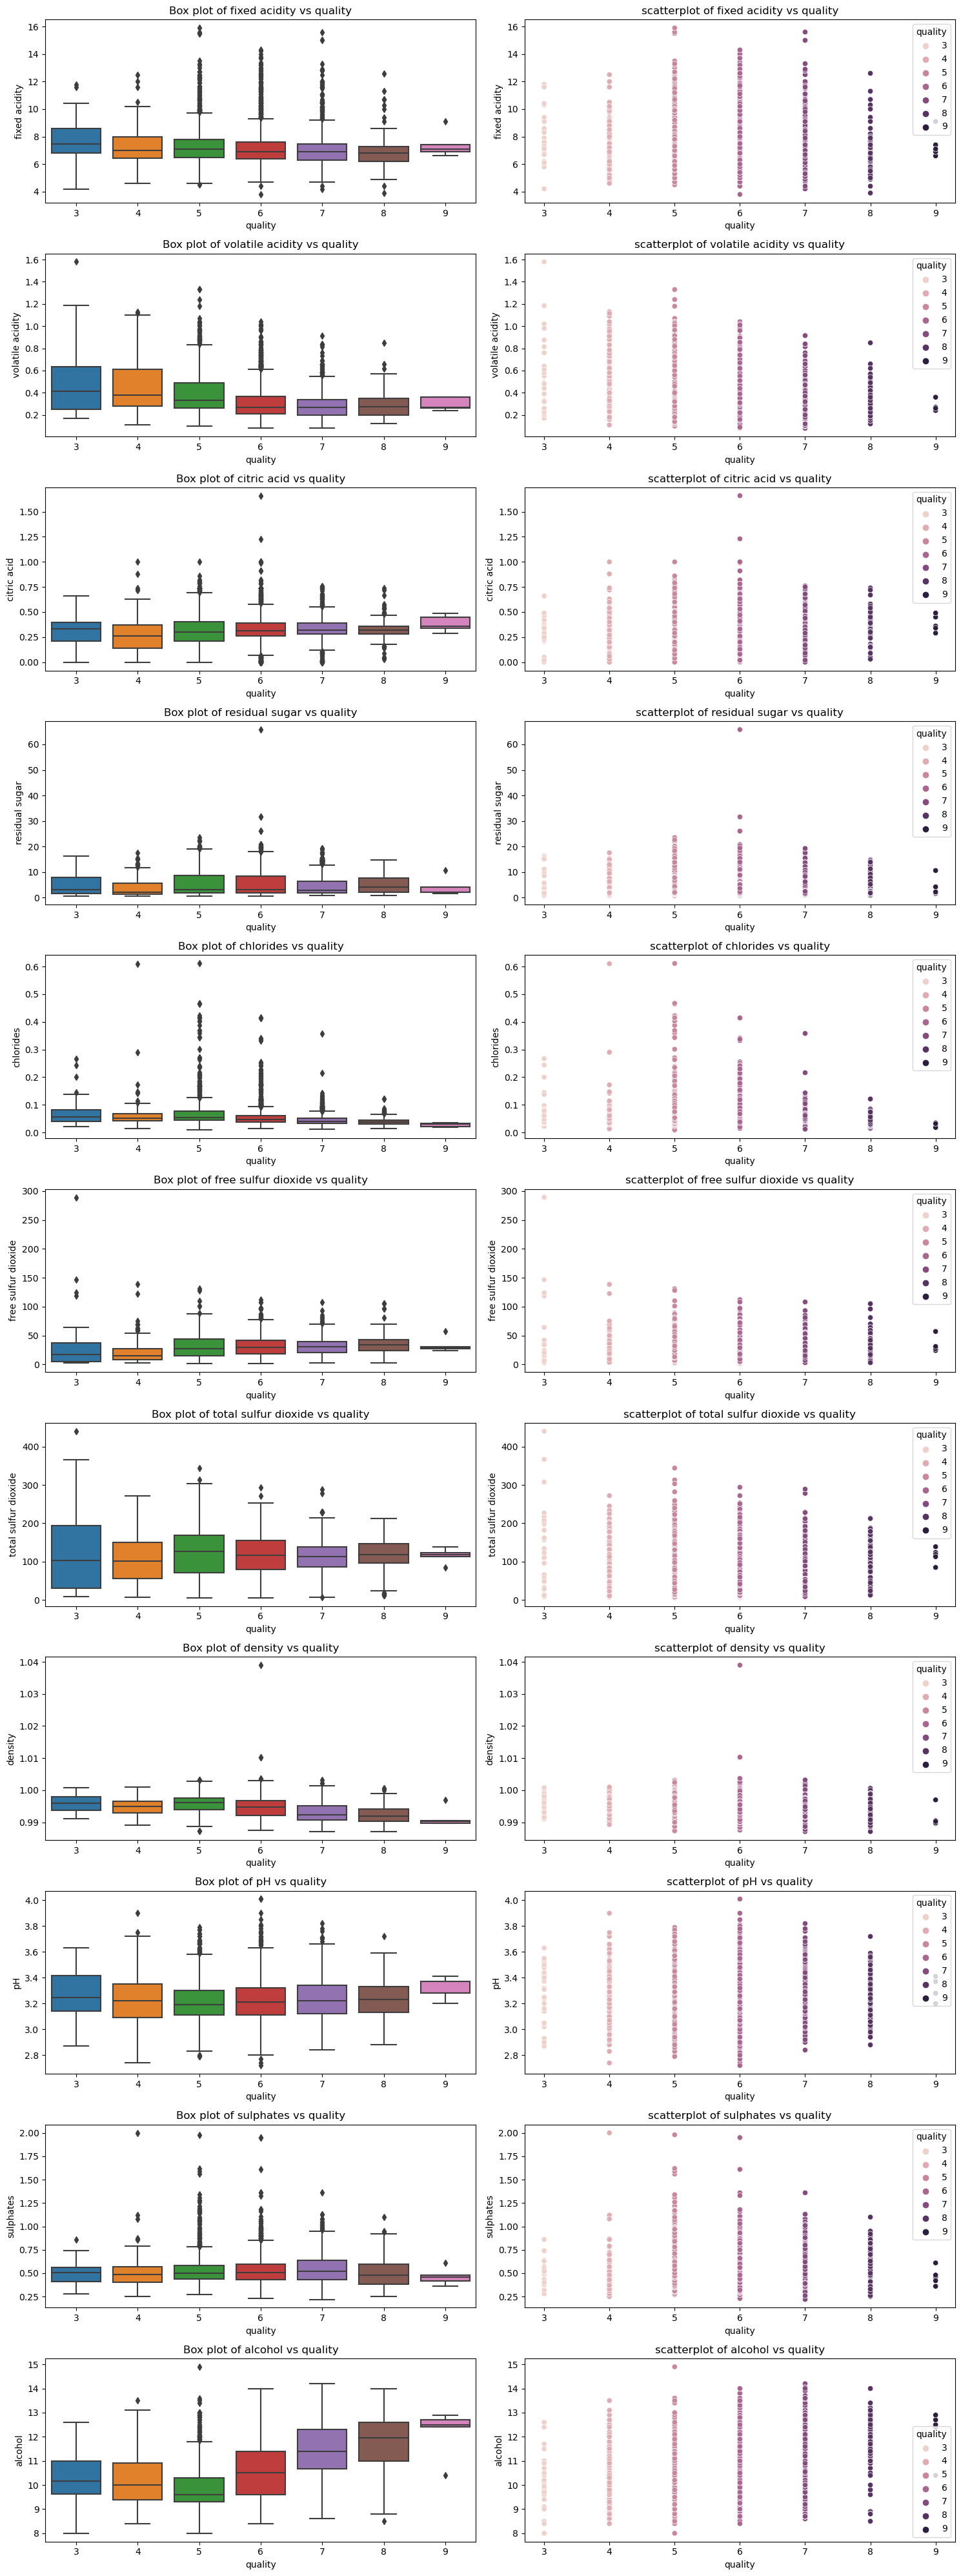

In [18]:
# Define the features
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]

# Plot the box plots and violin plots of each feature against quality
fig, axes = plt.subplots(11, 2, figsize=(15, 40))
for i, feature in enumerate(features):
    # box plot
    sns.boxplot(x="quality", y=feature, data=df_no_null, ax=axes[i, 0])
    axes[i, 0].set_title(f"Box plot of {feature} vs quality")
    # scatter plot
    sns.scatterplot(x="quality", y=feature, data=df_no_null, hue="quality", ax=axes[i, 1])
    axes[i, 1].set_title(f"scatterplot of {feature} vs quality")
plt.tight_layout()
plt.show()


# Explore the Target Variable

In [19]:
df_no_null['quality'].value_counts().sort_values(ascending=False)

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

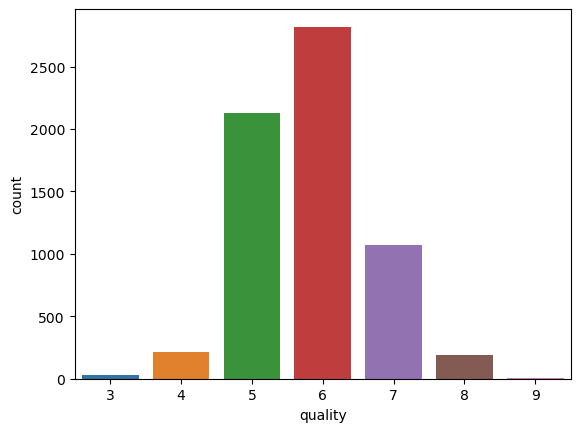

In [20]:
sns.countplot('quality', data = df_no_null)


# Binarize the Target Variable

In [21]:
# Binarize the quality column using a lambda function
df_no_null.loc[:, "quality_binary"] = df_no_null["quality"].apply(lambda x: 1 if x > 5 else 0)

# Check the value counts of the binarized quality column
df_no_null["quality_binary"].value_counts()

C:\Users\deepa\AppData\Local\Temp\ipykernel_9016\1454888876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null.loc[:, "quality_binary"] = df_no_null["quality"].apply(lambda x: 1 if x > 5 else 0)


1    4091
0    2372
Name: quality_binary, dtype: int64

In [22]:
df_no_null.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white,quality_binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1


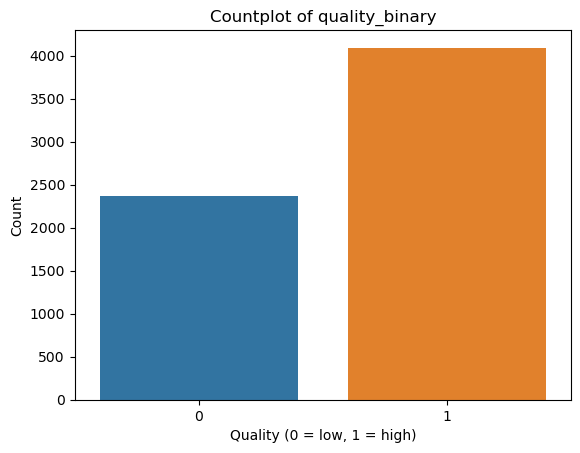

In [23]:
# Make a countplot of the quality_binary column in sns
sns.countplot(x="quality_binary", data=df_no_null)
plt.title("Countplot of quality_binary")
plt.xlabel("Quality (0 = low, 1 = high)")
plt.ylabel("Count")
plt.show()

# Target variable, Train & Test Data 

In [24]:
# X and y creation
X = df_no_null.copy()
y = X.pop('quality_binary')

In [25]:
from sklearn.model_selection import train_test_split
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Features Scaling

In [56]:
#Features Scaling 

# Set the scaler
scaler = MinMaxScaler()

# PCA

In [57]:
#PCA 
from sklearn.decomposition import PCA

# Set pca components
pca =  PCA(n_components=0.9)



# Logistic Regression

In [58]:
# Create a full pipeline with pca_pipeline and logistic regression
logreg_full_pipeline = make_pipeline(scaler, pca, LogisticRegression())

# Fit the full pipeline to the data
logreg_full_pipeline.fit(X_train, y_train)



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression', LogisticRegression())])

In [59]:
# Check the score of the full pipeline on the data
logreg_full_pipeline.score(X_train, y_train)

0.9608753315649867

In [60]:
# predict the y variable
log_y_pred = logreg_full_pipeline.predict(X_test)

In [61]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, log_y_pred)

In [62]:
# Print the classification report
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       722
           1       0.96      0.98      0.97      1217

    accuracy                           0.96      1939
   macro avg       0.96      0.95      0.96      1939
weighted avg       0.96      0.96      0.96      1939



# Decision Tree Classifier

In [63]:
# Create a full pipeline with pca_pipeline and logistic regression
dt_full_pipeline = make_pipeline(scaler, pca, DecisionTreeClassifier())

# Fit the full pipeline to the data
dt_full_pipeline.fit(X_train, y_train)



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [64]:
# Check the score of the full pipeline on the data
dt_full_pipeline.score(X_train, y_train)

1.0

In [65]:
dt_y_pred = dt_full_pipeline.predict(X_test)

In [66]:
# Calculate the accuracy of the model on the test data
dt_accuracy = accuracy_score(y_test, dt_y_pred)

In [67]:
dt_accuracy

0.9437854564208354

In [68]:
# Print the classification report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       722
           1       0.96      0.95      0.96      1217

    accuracy                           0.94      1939
   macro avg       0.94      0.94      0.94      1939
weighted avg       0.94      0.94      0.94      1939



# Random Forest Classifier

In [69]:
# Create a full pipeline with pca_pipeline and logistic regression
rf_full_pipeline = make_pipeline(scaler, pca, RandomForestClassifier())

# Fit the full pipeline to the data
rf_full_pipeline.fit(X_train, y_train)

# Check the score of the full pipeline on the data
rf_full_pipeline.score(X_train, y_train)

1.0

In [70]:
rf_y_pred = rf_full_pipeline.predict(X_test)

In [71]:
# Calculate the accuracy of the model on the test data
rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [72]:
rf_accuracy

0.9757607013924704

In [73]:
# Print the classification report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       722
           1       0.98      0.99      0.98      1217

    accuracy                           0.98      1939
   macro avg       0.98      0.97      0.97      1939
weighted avg       0.98      0.98      0.98      1939



# KNN Classifier

In [74]:
#Create the KNN Full Pipeline
knn_full_pipeline = make_pipeline(scaler, pca, KNeighborsClassifier())

# Fit the full pipeline to the data
knn_full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [75]:
knn_y_pred = knn_full_pipeline.predict(X_test)

In [76]:
# Print the classification report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       722
           1       0.97      0.98      0.98      1217

    accuracy                           0.97      1939
   macro avg       0.97      0.97      0.97      1939
weighted avg       0.97      0.97      0.97      1939



# Support Vector Classifier

In [77]:
#Create the SVC Full Pipeline
svc_full_pipeline = make_pipeline(scaler, pca, SVC())

# Fit the full pipeline to the data
svc_full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9)), ('svc', SVC())])

In [78]:
svc_y_pred = svc_full_pipeline.predict(X_test)

In [79]:
# Print the classification report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       722
           1       0.97      0.98      0.98      1217

    accuracy                           0.97      1939
   macro avg       0.97      0.97      0.97      1939
weighted avg       0.97      0.97      0.97      1939



# Gradient Boosting Classifier

In [80]:
#Create a pipeline using GB Classifier
gb_full_pipeline = make_pipeline(scaler, pca, GradientBoostingClassifier())

# Fit the full pipeline to the data
gb_full_pipeline.fit(X_train, y_train)

#Get the prediction
gb_y_pred = gb_full_pipeline.predict(X_test)

In [81]:
# Print the classification report
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       722
           1       0.97      0.98      0.98      1217

    accuracy                           0.97      1939
   macro avg       0.97      0.96      0.97      1939
weighted avg       0.97      0.97      0.97      1939



# Best Models Comparison

In [82]:
best_models = pd.DataFrame({"Classifier" : ["logistic_regression", "decision_tree", "random_forest", "knn", "svc", "gradient_boosting"],
            "Accuracy" : [accuracy_score(y_test, log_y_pred)*100,
                         accuracy_score(y_test, dt_y_pred)*100,
                         accuracy_score(y_test, rf_y_pred)*100,
                         accuracy_score(y_test, knn_y_pred)*100,
                         accuracy_score(y_test, svc_y_pred)*100,
                         accuracy_score(y_test, gb_y_pred)*100]},
                          )

In [83]:
# Format the accuracy column to 2 decimal places
best_models['Accuracy'] = best_models['Accuracy'].round(2)

In [84]:
best_models

,Classifier,Accuracy
0,logistic_regression,95.98
1,decision_tree,94.38
2,random_forest,97.58
3,knn,97.16
4,svc,97.58
5,gradient_boosting,96.91


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


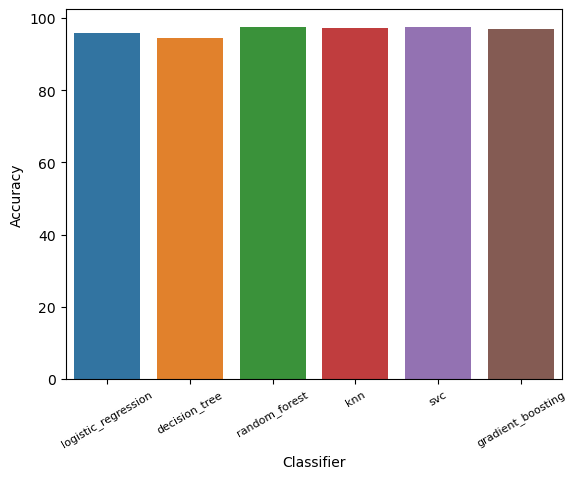

In [85]:
#Plot the data
ax = sns.barplot('Classifier', 'Accuracy', data = best_models)
plt.xticks(fontsize=8, rotation=30)
plt.show()